In [14]:
from rescure import initial_random_matrix
from rescure import get_rates_phenol
from rescure import choose_event
import numpy as np

In [15]:
ratio = (1, 2, 1)

inital_state = initial_random_matrix(15, ratio)

print(inital_state)

[[1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1.]
 [0. 0. 1. 0. 2. 0. 0. 1. 2. 1. 1. 2. 1. 1. 1.]
 [1. 2. 0. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 0. 1.]
 [2. 1. 1. 0. 0. 1. 1. 1. 2. 1. 1. 2. 2. 2. 2.]
 [0. 1. 1. 1. 1. 2. 2. 1. 2. 2. 0. 0. 1. 1. 1.]
 [0. 2. 2. 0. 1. 0. 1. 2. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 2. 0. 1. 2. 2. 0. 2. 1. 2.]
 [1. 1. 1. 1. 2. 0. 0. 1. 0. 2. 1. 1. 0. 2. 1.]
 [0. 0. 0. 0. 1. 2. 1. 2. 0. 1. 1. 1. 1. 1. 1.]
 [2. 2. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 2.]
 [1. 2. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [2. 0. 1. 0. 1. 0. 1. 1. 1. 1. 2. 2. 1. 0. 0.]
 [0. 1. 2. 2. 2. 1. 1. 0. 1. 1. 1. 0. 1. 2. 1.]
 [1. 1. 2. 2. 1. 1. 0. 0. 0. 0. 2. 1. 0. 1. 1.]
 [2. 2. 0. 1. 1. 2. 0. 0. 2. 1. 0. 1. 1. 1. 1.]]


In [16]:
n_phenol = np.count_nonzero(inital_state == 1)
n_coal = np.count_nonzero(inital_state == 2)
n_void = np.count_nonzero(inital_state == 0)

print(n_phenol, n_coal, n_void)

125 51 49


In [17]:
# Test to see if the distrubution is the correct ratio:

n = len(inital_state)

voids = []
phenols = []
coals = []

for i in range(n):
    for j in range(n):
        if inital_state[i][j] == 0:
            voids.append((i, j))
        elif inital_state[i][j] == 1:
            phenols.append((i, j))
        elif inital_state[i][j] == 2:
            coals.append((i, j))

print(len(voids))
print(len(phenols))
print(len(coals))

# Looks like it's working!

49
125
51


Let's test the kernel / filter:

In [18]:
start_mol = (5, 4)
i, j = start_mol

periphery = []

for k in range(i-1, j+2):
    for l in range(j-1, j+2):
        periphery.append(inital_state[k, l]) #NOT WORKING

# Reshape the periphery array to be a 3x3 array:

# periphery = np.array(periphery).reshape(3, 3)
print(periphery)

[1.0, 1.0, 2.0, 0.0, 1.0, 0.0]


In [19]:
# Different method of setting up the kernel / mask:

start_mol = (5, 4)
i, j = start_mol

kernel = np.zeros((3, 3))

kernel[0, 0] = 1 # Still need to figure out how to do this automatically

Testing a simple rate function calculator:

In [20]:
state = inital_state

pos_1 = (3, 6)
pos_2 = (8, 12)
pos_3 = (13, 2)

T = 1

rates_1 = get_rates_phenol(state, pos_1, T)
rates_2 = get_rates_phenol(state, pos_2, T)
rates_3 = get_rates_phenol(state, pos_3, T)

print(rates_1)
print("\n")
print(rates_2)
print("\n")
print(rates_3)

(3.8, 0.11999999999999994, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [(2, 5), (2, 6), (2, 7), (3, 5), (3, 7), (4, 5), (4, 6), (4, 7)], [1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0])


(4.5600000000000005, 0.03999999999999998, 0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, [(7, 11), (7, 12), (7, 13), (8, 11), (8, 13), (9, 11), (9, 12), (9, 13)], [1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0])


(2.2800000000000002, 0.15999999999999992, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, [(12, 1), (12, 2), (12, 3), (13, 1), (13, 3), (14, 1), (14, 2), (14, 3)], [1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0])


In [21]:
event1 = choose_event(rates_1[0:11], 1)
event2 = choose_event(rates_2[0:11], 2)
event3 = choose_event(rates_3[0:11], 1)

print(event1)
print(event2)
print(event3)

pp_rxn
pc_rxn
pp_rxn


# Let's test the simulation:

In [4]:
import rescure
import numpy as np

In [2]:
n = 20
ratio = (100, 5, 1) # (voids, phenols, coals)
T = 353.5 # Kelvin
n_iter = 100

test_matrix = rescure.initial_random_matrix(15, ratio)
print(test_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
test_rates = rescure.get_rates_phenol(test_matrix, (5, 4), T)
print(test_rates[0:11])

(0.0, 0.0, 1, 1, 1, 1, 1, 1, 1, 1, 1)


In [37]:
n = 80
ratio = (20, 3, 2) # (voids, phenols, coals)
T = 353.5 # Kelvin
n_iter = 100

state_list, temps, crosslinks, coal_rxn, heat_rxn, init_mols, final_mols = rescure.resin_cure_simulation(n, ratio, T, n_iter)

degree_of_crosslinking = (1 - (final_mols[1] / init_mols[1])) * 100

pseudotime = np.linspace(0, n_iter+1, n_iter+1)

print("Temperatures: ", temps)
print("# of Crosslinks: ", crosslinks)
print("# of Coal Reactions / state: ", coal_rxn)
print("delta H rxn / state: ", heat_rxn)
print("\n")
print("Initial voids: ", init_mols[0], "\n",
      "Initial phenols: ", init_mols[1], "\n",
      "Initial coals: ", init_mols[2])
print("\n")
print("Final voids: ", final_mols[0], "\n",
      "Final phenols: ", final_mols[1], "\n",
      "Final coals: ", final_mols[2], "\n",
      "Final Crosslinks: ", final_mols[3], "\n",
      "Final Coal Reactions: ", final_mols[4], "\n")
print("\n")
print("Degree of Crosslinking: ", degree_of_crosslinking, "%")


Temperatures:  [353.5, 368.1253115578079, 381.9432651129687, 395.2800186055114, 408.7222158515599, 422.03555402066536, 435.30442456577833, 448.72113039653783, 462.2430000624389, 475.90224174785396, 489.3917214583235, 502.7698510846038, 516.2362494048062, 529.3302477868051, 542.6276107891263, 555.6229934785713, 568.5794257933876, 581.4447097162379, 594.4400924056829, 607.4106190808138, 620.1376684502377, 633.0817343279757, 645.0991033131473, 657.3989409249656, 669.4163099101372, 681.7161475219555, 694.2985809354642, 706.7637048741856, 706.7637048741856, 718.7810738593572, 718.7810738593572, 731.363507272866, 743.5034454973485, 756.0858789108572, 756.0858789108572, 768.5510028495786, 781.0161267883, 793.7639738228855, 806.0638114347038, 806.0638114347038, 806.0638114347038, 818.0811804198754, 818.0811804198754, 818.0811804198754, 830.3810180316937, 842.9634514452024, 842.9634514452024, 855.2632890570206, 855.2632890570206, 855.2632890570206, 855.2632890570206, 867.2806580421923, 879.5804

Success! For now.

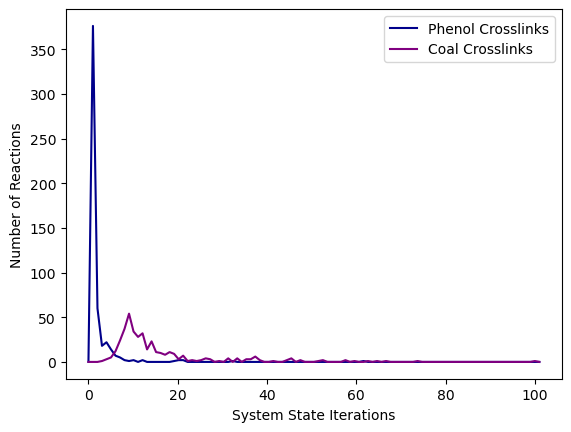

In [38]:
import matplotlib.pyplot as plt

# plt.plot(pseudotime, temps, label="Temperature")
plt.plot(pseudotime, crosslinks, label="Phenol Crosslinks", color="darkblue")
plt.plot(pseudotime, coal_rxn, label="Coal Crosslinks", color="purple")
# plt.plot(pseudotime, heat_rxn, label="Heat of Reaction")

plt.xlabel("System State Iterations")
plt.ylabel("Number of Reactions")

plt.legend()

plt.show()

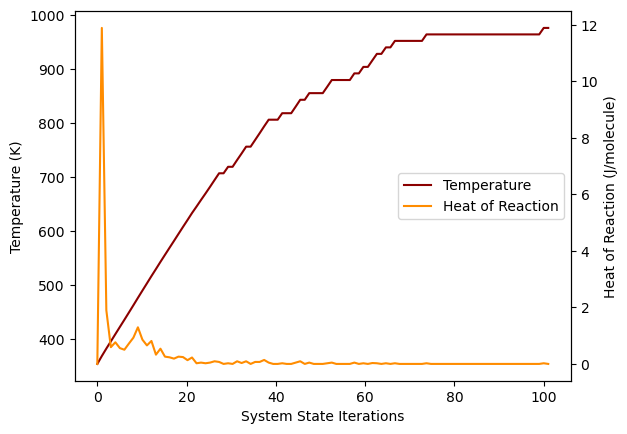

In [39]:
fig, ax1 = plt.subplots()

ax1.plot(pseudotime, temps, label="Temperature", color='darkred')
ax1.set_xlabel("System State Iterations")
ax1.set_ylabel("Temperature (K)")

ax2 = ax1.twinx()
ax2.plot(pseudotime, heat_rxn, label="Heat of Reaction", color='darkorange')
ax2.set_ylabel("Heat of Reaction (J/molecule)")

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax1.legend(handles, labels, loc='center right')

plt.show()

In [40]:
state_1 = state_list[0]
state_2 = state_list[-1]

Can we turn this into a heatmap?

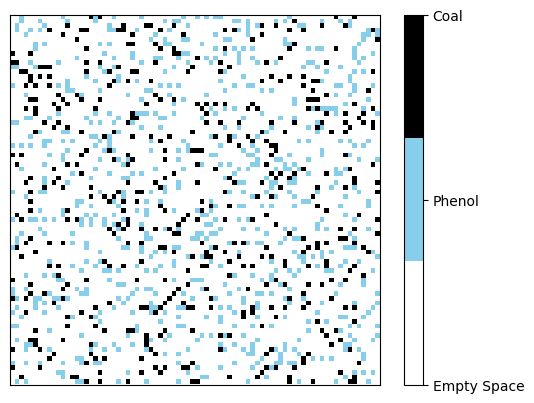

In [45]:
# Define the custom colormap and color labels
cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'black'])
color_labels = ['Empty Space', 'Phenol', 'Coal']

# Plot the heat map using the custom colormap
plt.imshow(state_1, cmap=cmap, interpolation='nearest')

# Remove ticks and numbers from the heat map
plt.xticks([])
plt.yticks([])

# Add colorbar with custom color labels
cbar = plt.colorbar(ticks=np.arange(len(color_labels)))
cbar.ax.set_yticklabels(color_labels)

# Show the plot
plt.show()


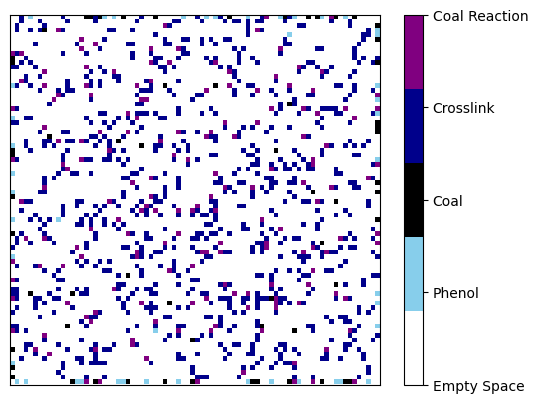

In [46]:
cmap = plt.cm.colors.ListedColormap(['white', 'skyblue', 'black', 'darkblue', 'purple'])
color_labels = ['Empty Space', 'Phenol', 'Coal', 'Crosslink', 'Coal Reaction']

plt.imshow(state_2, cmap=cmap, interpolation='nearest')

plt.xticks([])
plt.yticks([])

cbar = plt.colorbar(ticks=np.arange(len(color_labels)))
cbar.ax.set_yticklabels(color_labels)

plt.show()

In [48]:
# Precision of the simulation:

runs = 100

temps_avg_list = []
doc_avs_list = []

for i in range(runs):
    
    n = 80
    ratio = (20, 3, 2) # (voids, phenols, coals)
    T = 353.5 # Kelvin
    n_iter = 100

    state_list, temps, crosslinks, coal_rxn, heat_rxn, init_mols, final_mols = rescure.resin_cure_simulation(n, ratio, T, n_iter)

    degree_of_crosslinking = (1 - (final_mols[1] / init_mols[1])) * 100

    pseudotime = np.linspace(0, n_iter+1, n_iter+1)

    temps_avg_list.append(temps)
    doc_avs_list.append(degree_of_crosslinking)

temps_avg = np.mean(temps_avg_list, axis=0)
temps_std = np.std(temps_avg_list, axis=0)
doc_avs = np.mean(doc_avs_list, axis=0)
doc_std = np.std(doc_avs_list, axis=0)

print("Average Temperature: ", temps_avg)
print("Temperature Standard Deviation: ", temps_std)
print("Average Degree of Crosslinking: ", doc_avs)
print("Degree of Crosslinking Standard Deviation: ", doc_std)



Average Temperature:  [353.5        368.18509118 381.96086131 395.41807097 408.67409988
 421.80848189 435.05844813 448.52438897 462.15526903 475.80893038
 489.33915437 502.73236611 515.99585271 529.15099044 542.20585414
 555.1842799  567.90641071 580.41109156 592.87759691 605.4431408
 617.55427944 628.29600604 639.93551384 650.58013828 661.81396407
 672.89035736 683.43226647 693.58775892 702.14143189 710.47957023
 719.26438674 727.95048673 735.62681734 743.16341876 749.08424749
 755.97660711 764.0712787  771.09592134 778.24462402 784.51591401
 789.80971776 797.07429153 802.59348465 808.10027798 812.76833116
 817.30776386 822.23208751 825.91452809 830.10140773 833.28178048
 837.96324806 842.37851438 846.65857282 849.71472521 854.23342303
 858.26676486 861.56562973 865.61547225 868.31035975 871.38415242
 875.54755518 879.33673807 882.03508195 884.35792767 886.80659899
 889.37267236 891.6906354  894.25505673 897.5567224  900.98309317
 904.2762835  906.4733087  908.8018602  911.74380293 91